# Оценка пользовательской активности

## Описание проекта

Сеть фитнес-центров разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.
Чтобы бороться с оттоком, отдел по работе с клиентами перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

'Churn' — факт оттока в текущем месяце;

Текущие поля в датасете:

Данные клиента за предыдущий до проверки факта оттока месяц:
- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

# Загрузите данные

In [2]:
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score

In [3]:
#df = pd.read_csv('gym_churn.csv')

In [4]:
if os.path.exists('gym_churn.csv'):
    df = pd.read_csv('gym_churn.csv')
else:
    df = pd.read_csv('/datasets/gym_churn.csv')

In [5]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


# Исследовательский анализ данных (EDA)

## Отсутствующие признаки, средние значения и стандартные отклонения 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [7]:
for i in df.columns:
    print(i.upper())
    print(df[i].describe())
    print('********************************')

GENDER
count    4000.000000
mean        0.510250
std         0.499957
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: gender, dtype: float64
********************************
NEAR_LOCATION
count    4000.000000
mean        0.845250
std         0.361711
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Near_Location, dtype: float64
********************************
PARTNER
count    4000.000000
mean        0.486750
std         0.499887
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Partner, dtype: float64
********************************
PROMO_FRIENDS
count    4000.000000
mean        0.308500
std         0.461932
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Promo_friends, dtype: float64
********************************
PHONE
count    4000.00

In [8]:
for i in df.columns:
    print(i.upper())
    print(df[i].value_counts())
    print('*************v*********************')

GENDER
1    2041
0    1959
Name: gender, dtype: int64
*************v*********************
NEAR_LOCATION
1    3381
0     619
Name: Near_Location, dtype: int64
*************v*********************
PARTNER
0    2053
1    1947
Name: Partner, dtype: int64
*************v*********************
PROMO_FRIENDS
0    2766
1    1234
Name: Promo_friends, dtype: int64
*************v*********************
PHONE
1    3614
0     386
Name: Phone, dtype: int64
*************v*********************
CONTRACT_PERIOD
1     2207
12     960
6      833
Name: Contract_period, dtype: int64
*************v*********************
GROUP_VISITS
0    2351
1    1649
Name: Group_visits, dtype: int64
*************v*********************
AGE
29    468
30    457
28    447
31    434
27    378
32    364
26    300
33    253
25    231
34    174
24    148
35     98
23     82
36     48
22     33
37     29
21     24
20     14
38     10
39      3
18      2
19      2
41      1
Name: Age, dtype: int64
*************v*********************
AVG_A

## Средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался :

In [9]:
for i in df.columns:
    df = df.rename(columns = {i:i.lower()})

In [10]:
df.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


### Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);

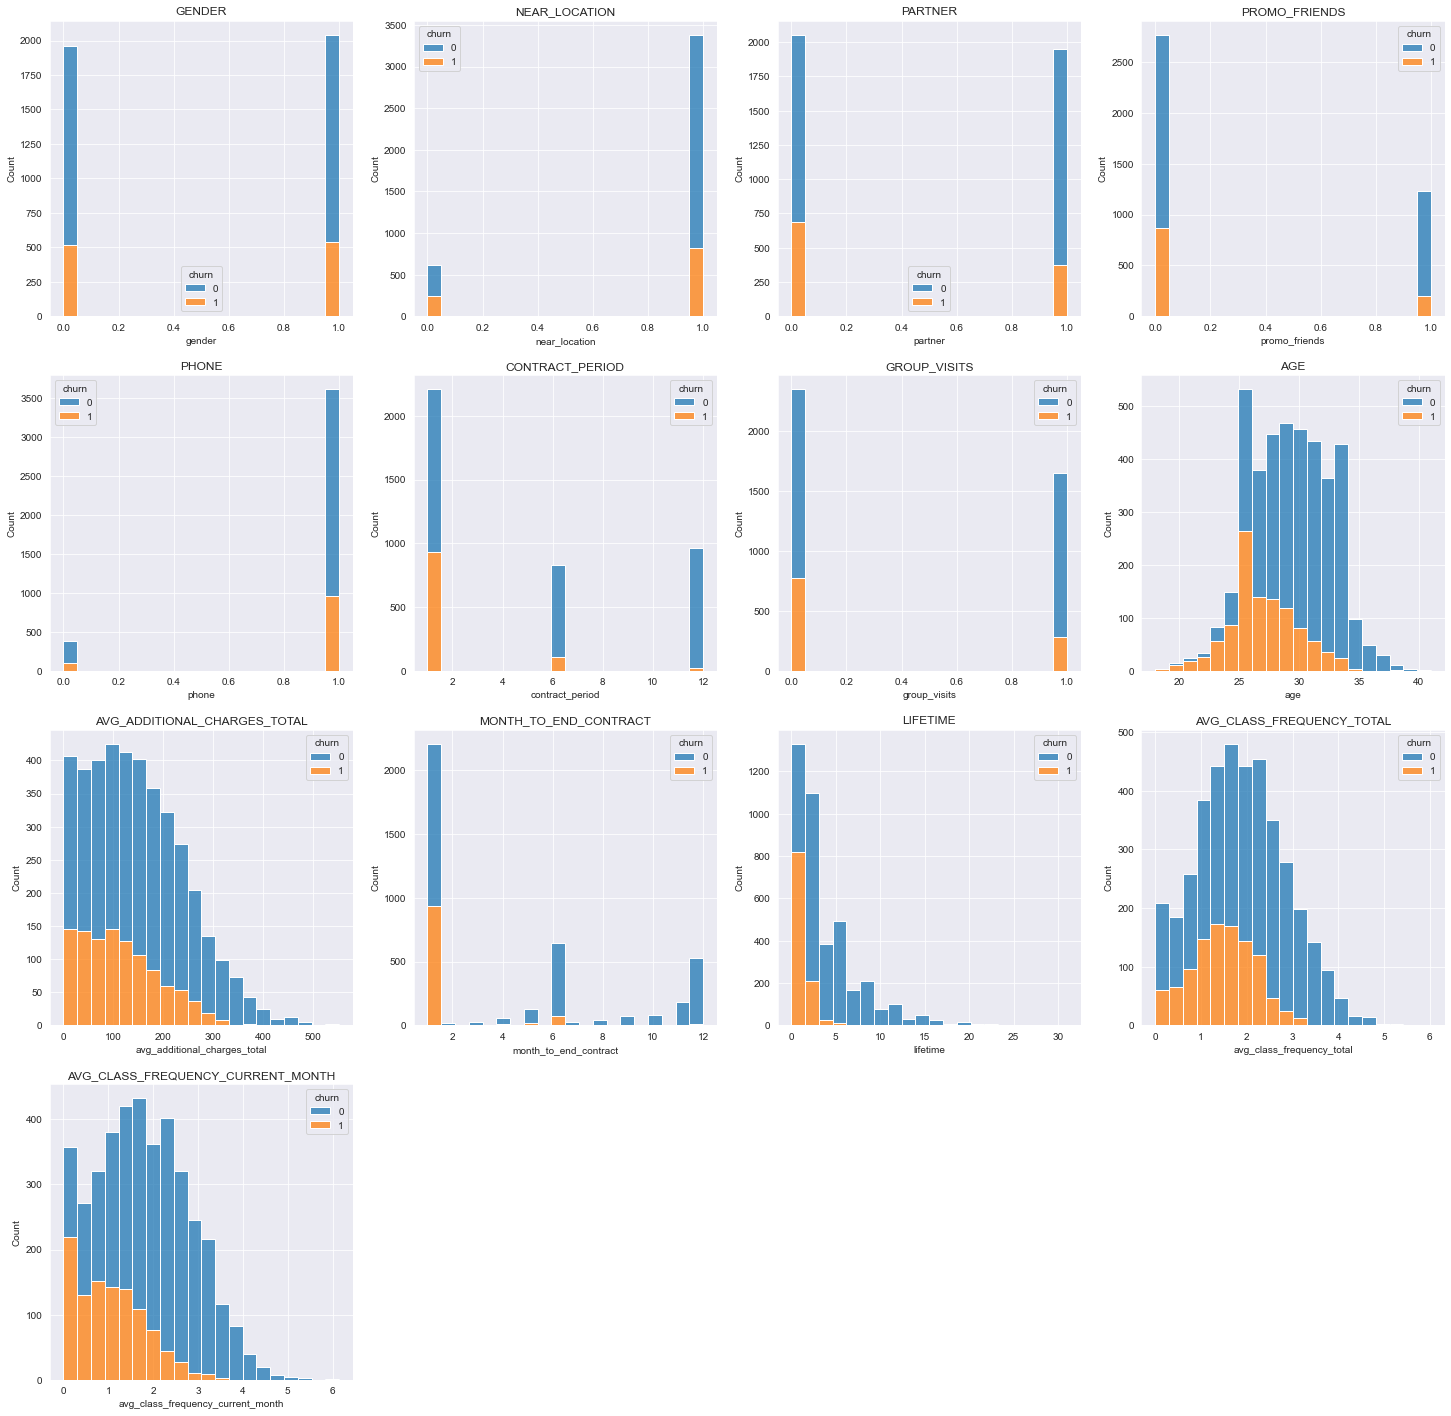

In [11]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=(25,25))
n = 0
for i in df.drop('churn', axis = 1).columns:
    plt.subplot(4, 4, n+1)
    g = sns.histplot(data = df,
                x = i,
                bins = 20, hue = 'churn', multiple="stack")
    plt.title(i.upper())
    n+=1

В целом распределения имеют схожий характер, пропорционально кол-ву групп ушедших и оставшихся. Исключение - возраст(ушедшие всреднем младше) и срок абонемента (у ушедших он в подавляющем большинстве на 1 месяц).

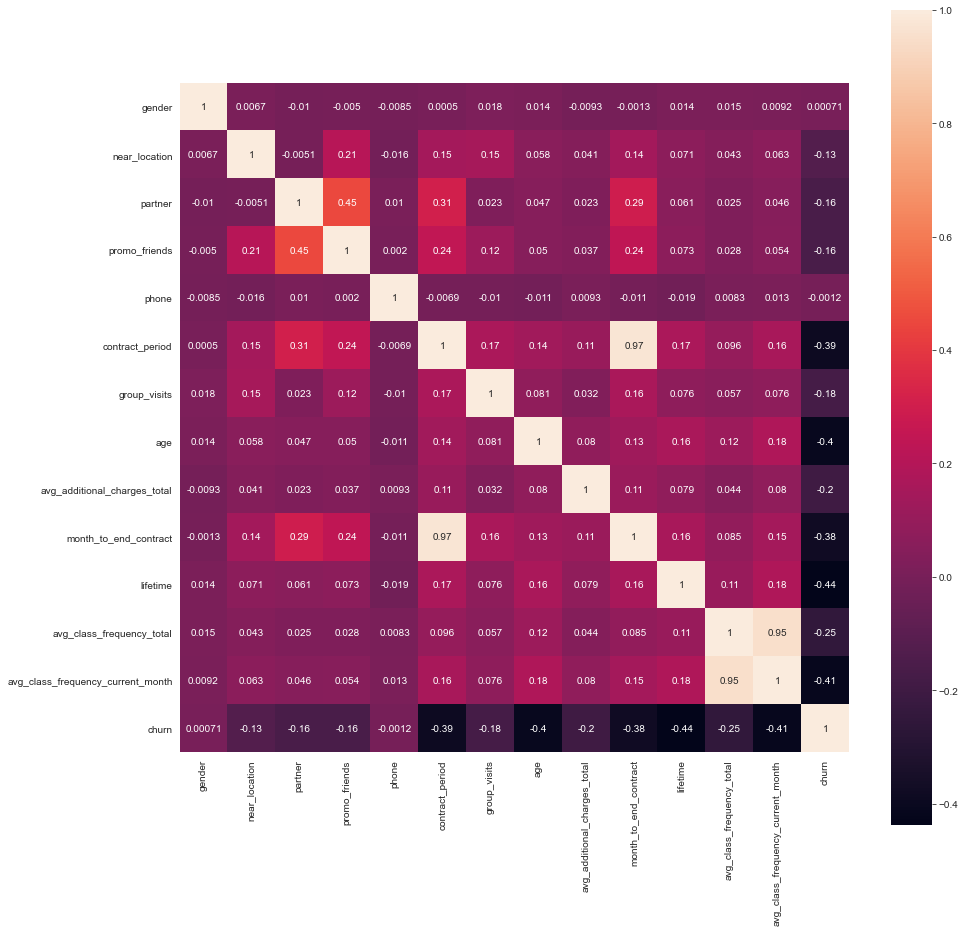

In [12]:
corr_m = df.corr()
plt.figure(figsize = (15,15))
ax = sns.heatmap(corr_m, square = True, annot = True)

## Модель прогнозирования оттока пользователей

In [13]:
X = df.drop(['churn'], axis = 1)
y = df['churn']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Логистическая регрессия

In [15]:
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразуйте обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [16]:
# зададим алгоритм для нашей модели
model_logrec = LogisticRegression(solver='liblinear', random_state=0)

# обучим модель
model_logrec.fit(X_train, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
predictions = model_logrec.predict(X_test)
probabilities = model_logrec.predict_proba(X_test)[:, 1]

In [17]:
from sklearn.metrics import roc_auc_score
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, probabilities)))

ROC_AUC: 0.97


In [18]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))

Accuracy: 0.93
Precision: 0.86
Recall: 0.83
F1: 0.85


### Случайный лес

In [19]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
# обучим модель случайного леса
rf_model.fit(X_train, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test)

In [20]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions)))

Accuracy: 0.92
Precision: 0.84
Recall: 0.82
F1: 0.83


Как видим, исходя из метрик, метод линейной регрессии имеет показатели лучше.

# Кластеризация 

In [21]:
scaler = StandardScaler() # создаём объект класса scaler (нормализатор)
#x_sc = scaler.fit_transform(df.drop(columns = ['churn'])) # обучаем нормализатор и преобразуем набор данных 
x_sc = scaler.fit_transform(df.drop(columns = ['churn','group_visits','phone','promo_friends','gender','near_location', 'partner']))

In [22]:
linked = linkage(x_sc, method = 'ward') 

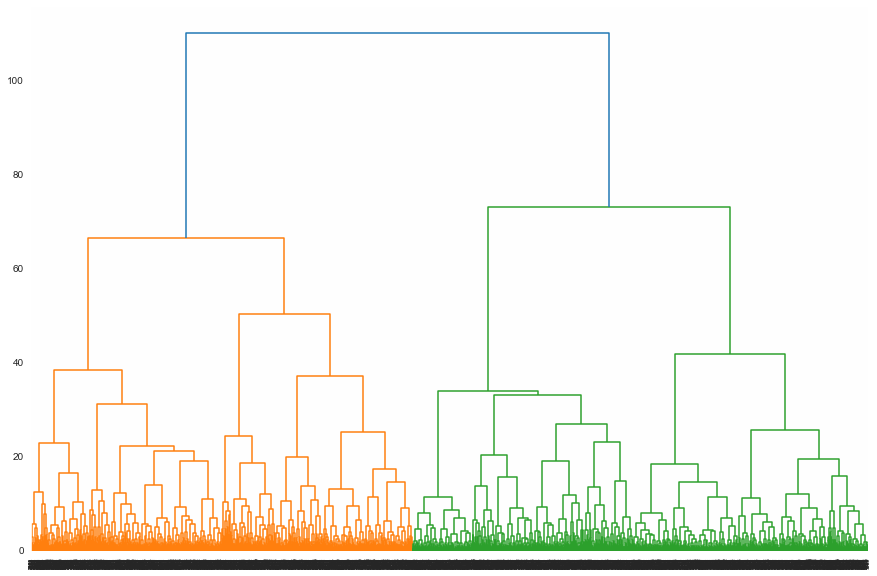

In [23]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show()

На основании полученного графика выделим 4 кластера.

In [28]:
km = KMeans(n_clusters = 4, random_state = 0)
labels = km.fit_predict(df.drop(['churn'], axis = 1))
df['cluster_km'] = labels
df.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.523580,0.867180,0.498556,0.336862,0.898941,5.201155,0.423484,29.390760,221.644225,4.809432,4.000962,1.897295,1.815714,0.195380
1,0.509282,0.823245,0.491525,0.292171,0.908797,4.302663,0.393059,28.953188,42.734136,3.947538,3.456013,1.832499,1.687906,0.347054
2,0.510894,0.847483,0.459053,0.293764,0.896319,4.309542,0.416980,29.045830,130.018773,3.987228,3.587528,1.877123,1.744276,0.299023
3,0.475703,0.849105,0.534527,0.335038,0.923274,5.764706,0.427110,29.838875,336.276165,5.360614,4.309463,1.984329,1.966070,0.076726


CLUSTER 0


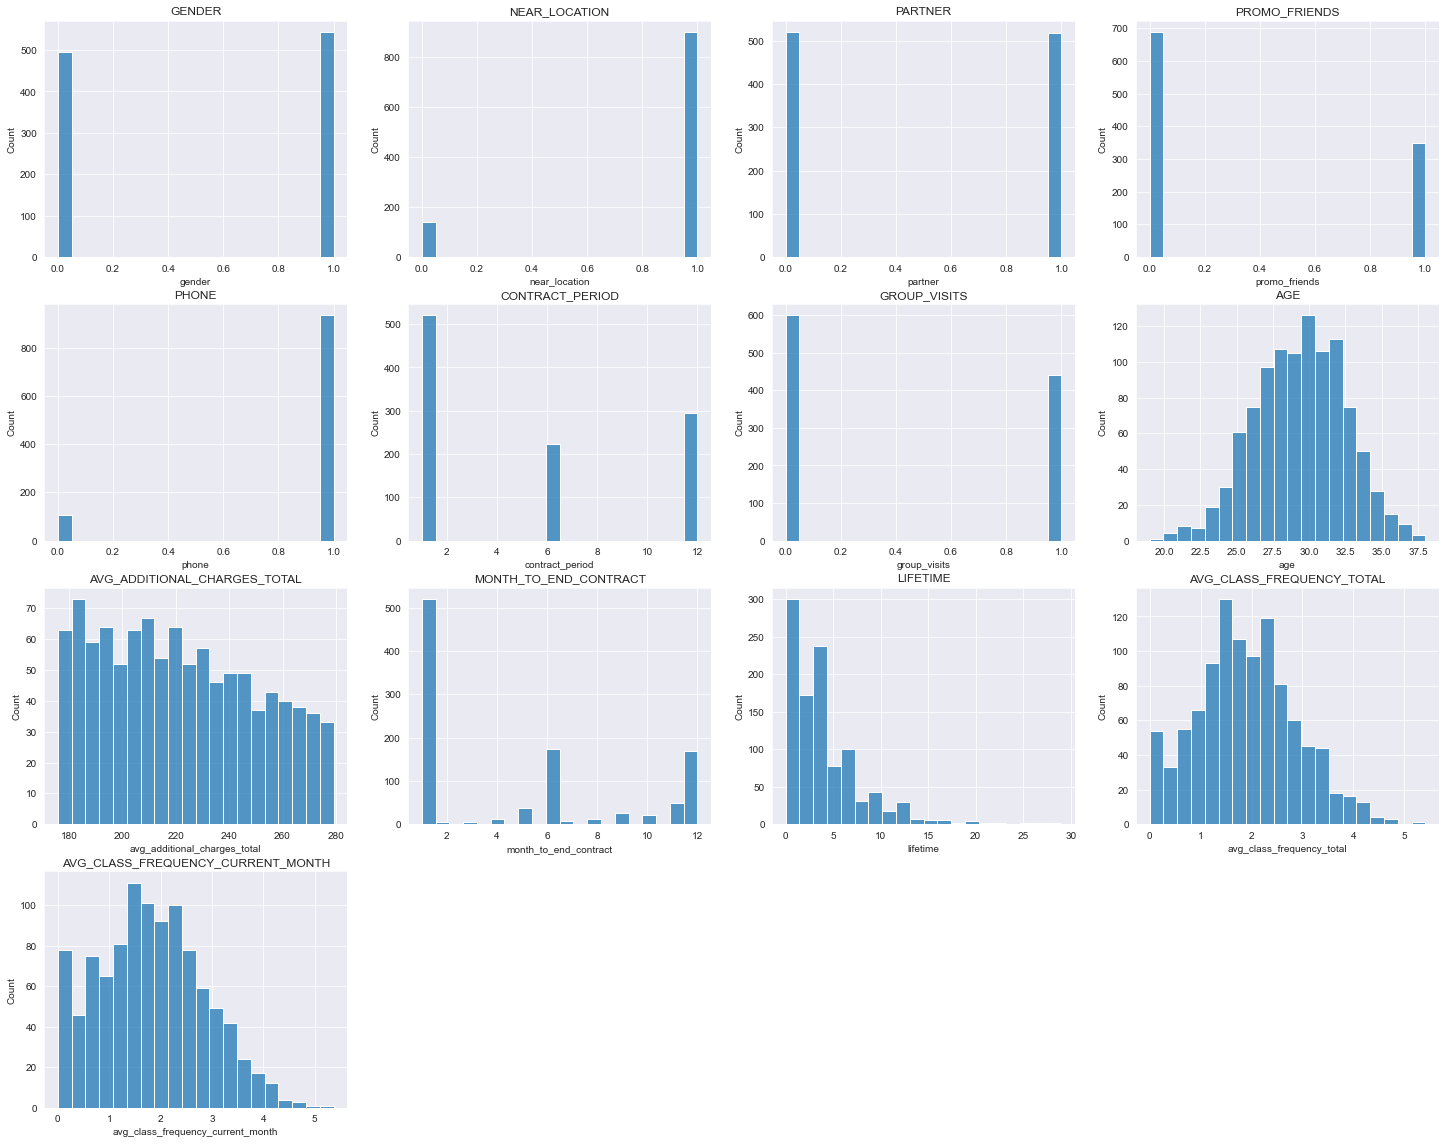

CLUSTER 1


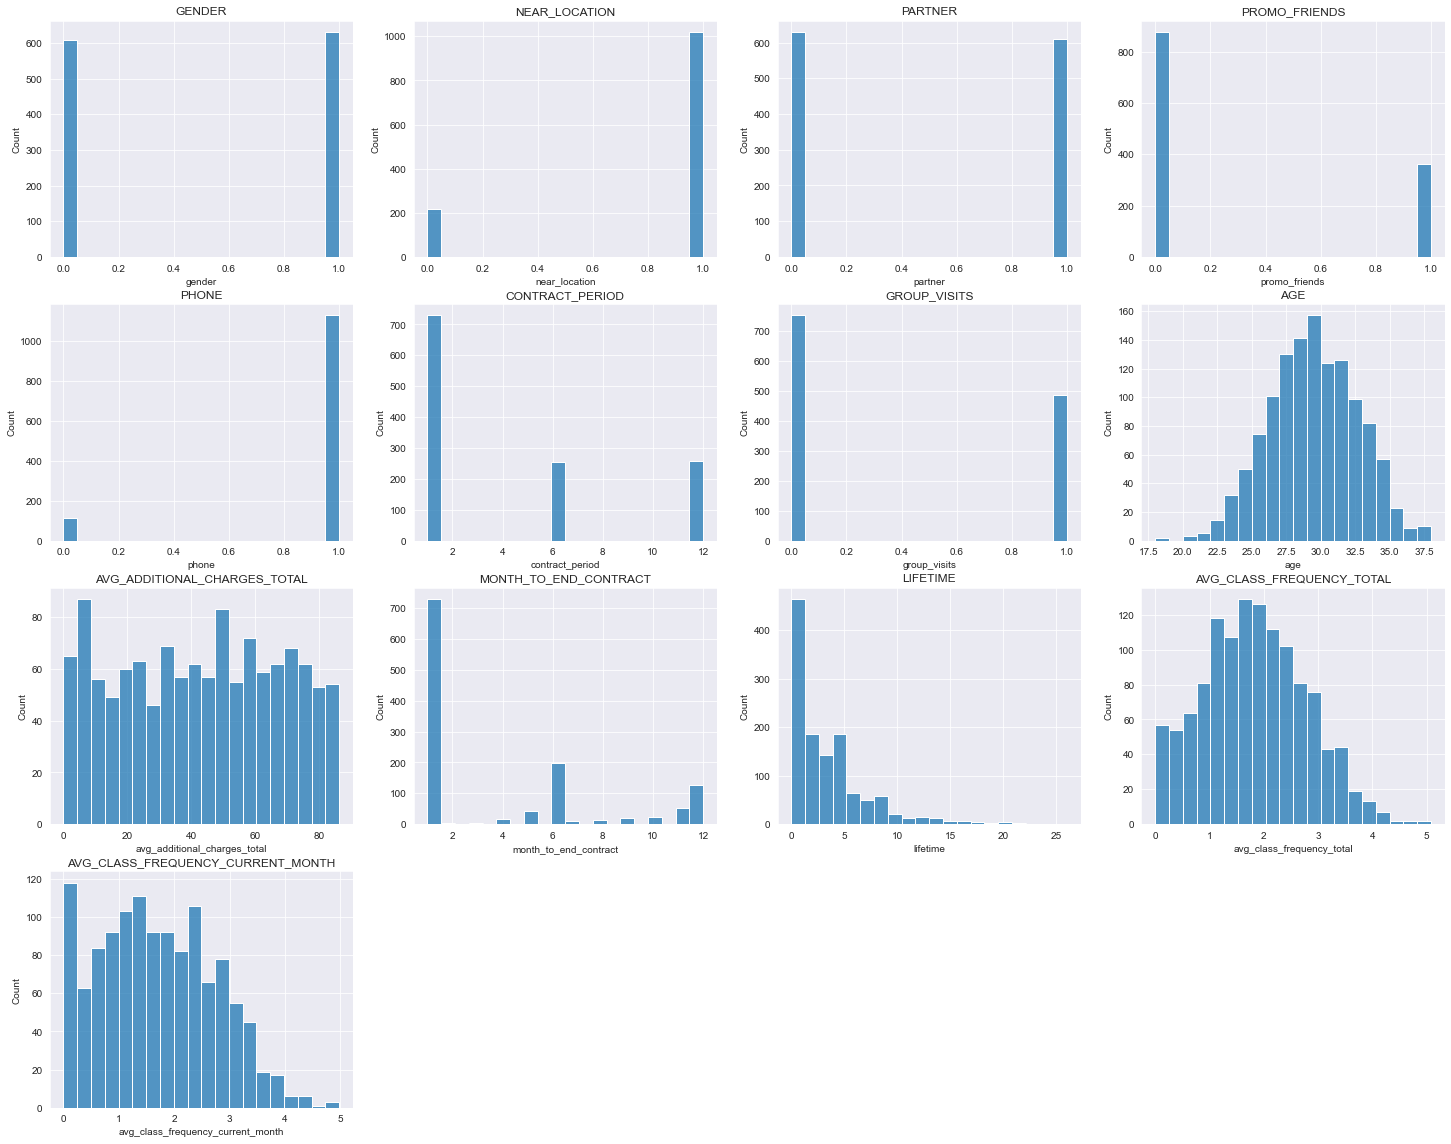

CLUSTER 2


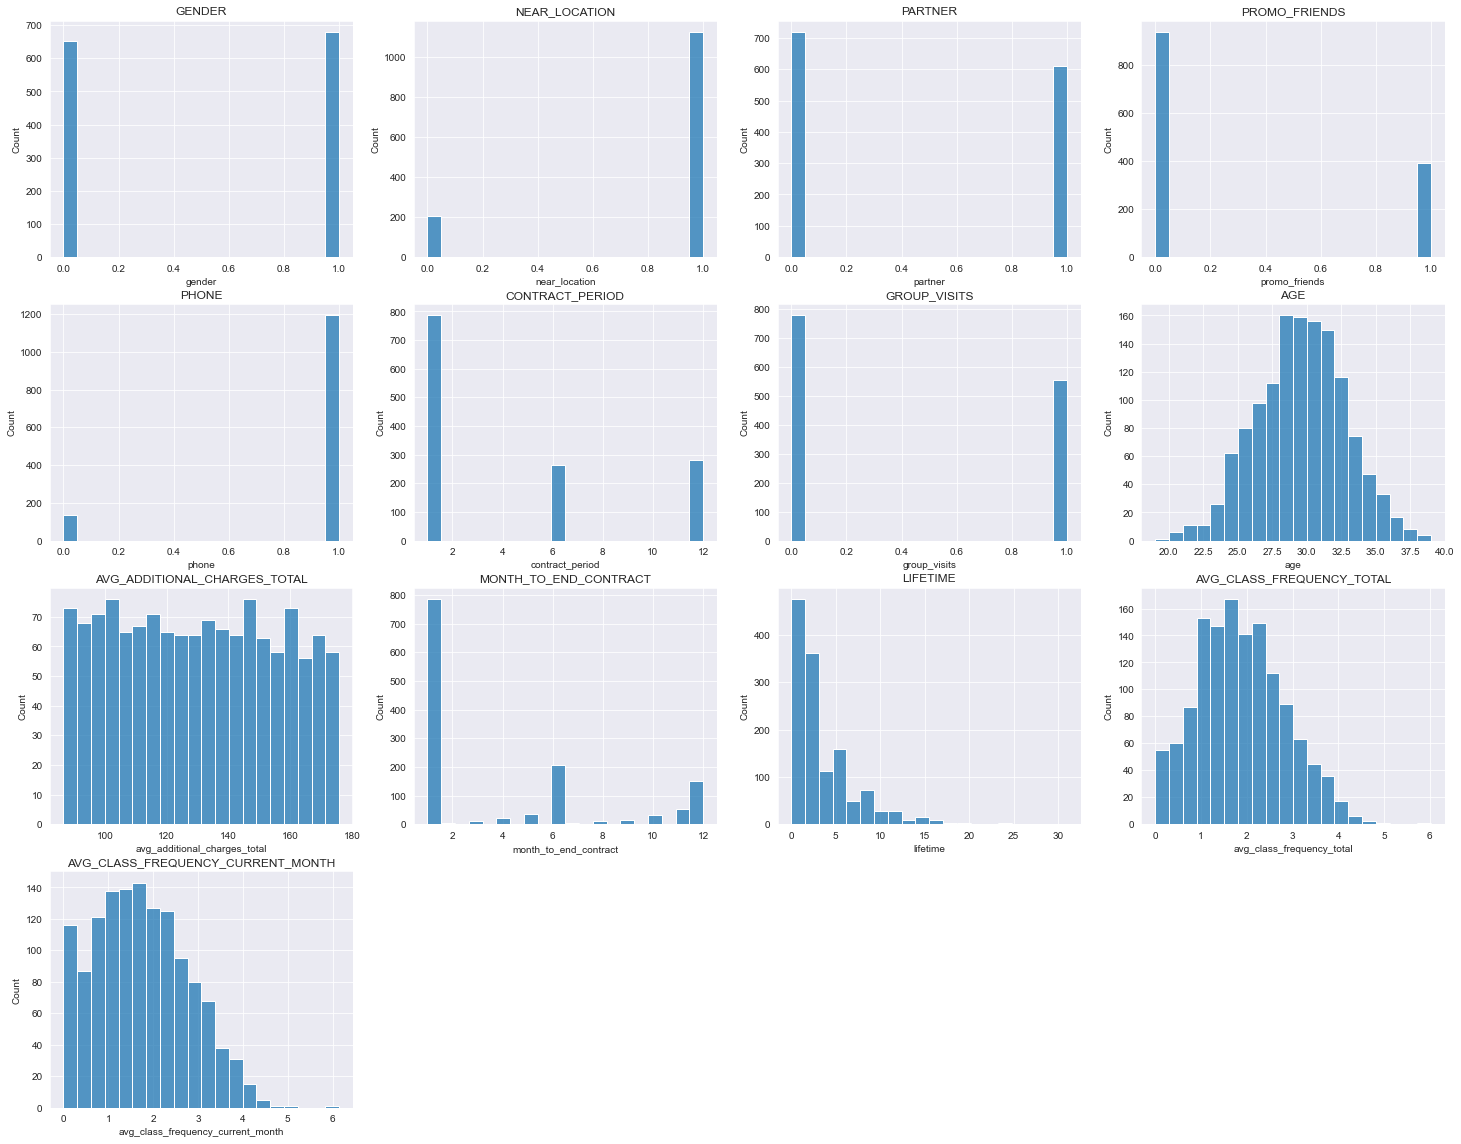

CLUSTER 3


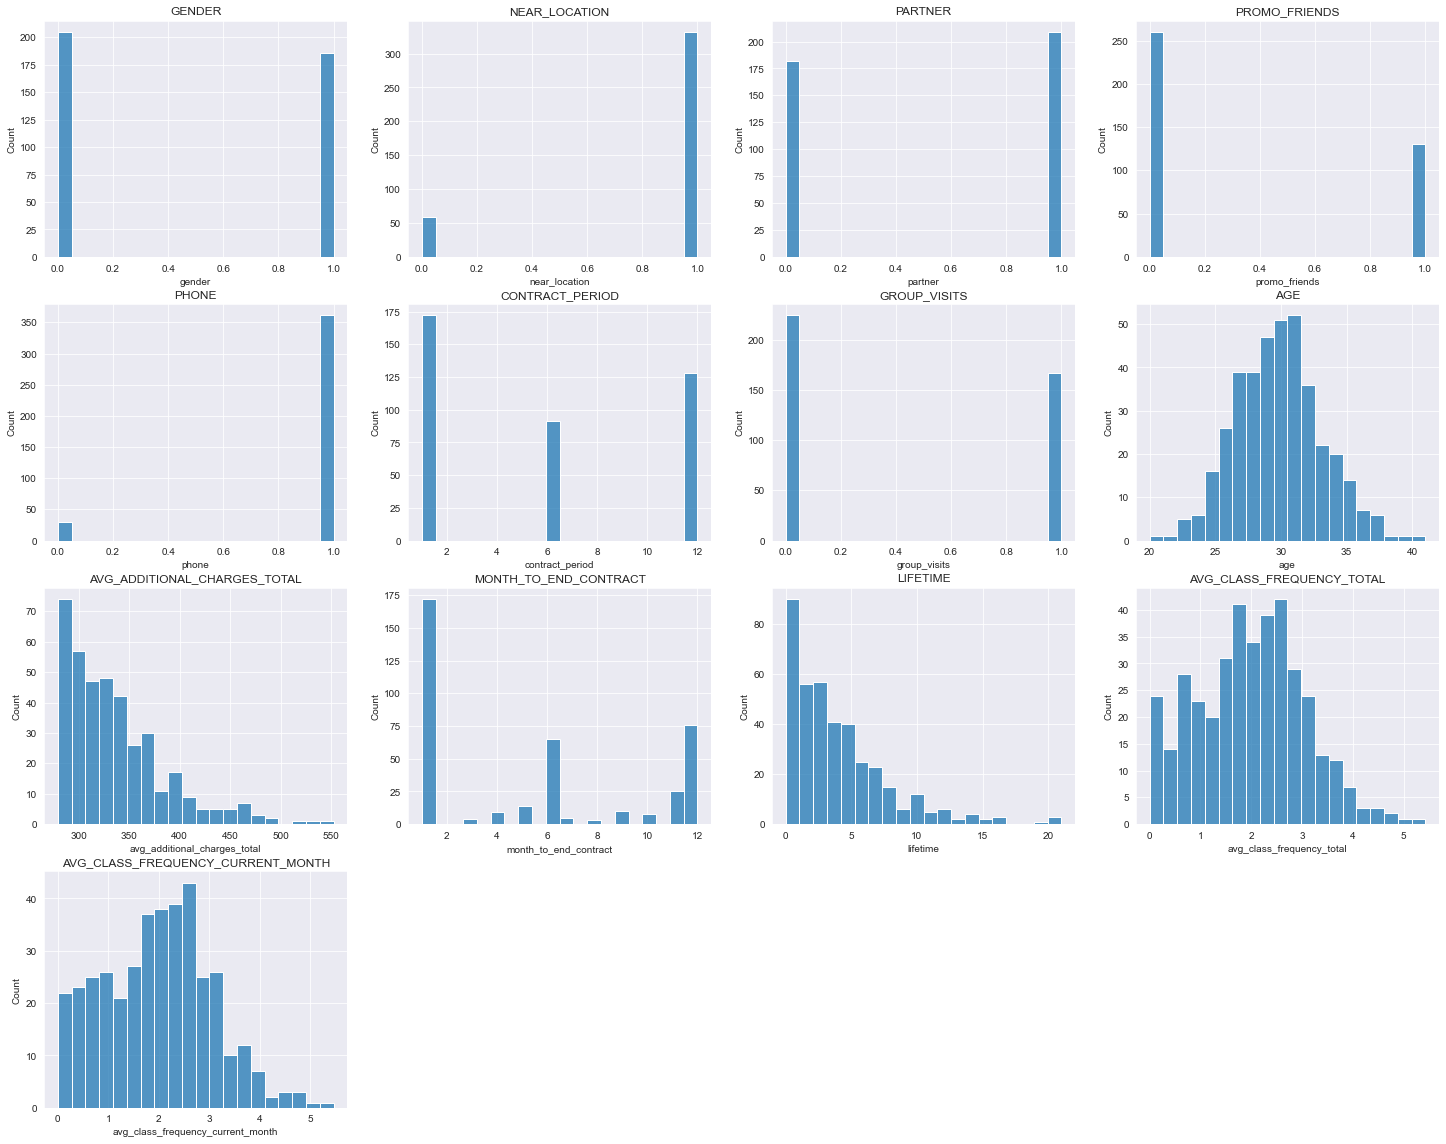

In [29]:
sns.set_style('darkgrid')
for j in range(4):
    print('CLUSTER', str(j).upper())
    fig = plt.figure(figsize=(25,20))
    n = 0
    for i in df.drop('churn', axis = 1).columns[:-1:1]:
        plt.subplot(4, 4, n+1)
        g = sns.histplot(data = df[df['cluster_km']==j],
                    x = i,
                    bins = 20)
        plt.title(i.upper())
        n+=1
    plt.show()

In [30]:
df.groupby('cluster_km').agg({'churn':'mean'})

,churn
cluster_km,
0,0.195380
1,0.347054
2,0.299023
3,0.076726


Получаем что 3 кластер имеет наименьший отток, а 1 - наибольший.

# Выводы и базовые рекомендации по работе с клиентами 

Посмотрев на средние значения посетителей, тех кто ушел и остался можно сделать первые выводы:

Часть параметров почти совпадают, но главное что выделяется - срок абонимента. У тех кто уходит он в среднем составляет 1 месяц. Так же отмечу что частота посещений спорт зала у убывших в среднем 1 раз в неделю, против 2 раз у оставшихся. И в среднем они моложе и тратят меньше денег на прочие услуши спортзала.

Стоит обратить внимание на то что убывшие клиенты реже являются пользователем партнерской программы и реже приходят по промо от друга. Так же они гораздо реже посещают групповые тренировки. Все это может говорить об низкой вовлеченности в жизнь клуба и социализации среди других посетителей. Не имея свой круг общения в спортзале им сложнее сохранять дисциплину и морально проще сменить зал (Возможно на тот где занимаются их друзья или коллеги)

При построении ML модели лучше всего себя проявила логистическая регрессия, показав чуть большие показатели метрик.

При кластеризации и дальнейшем рассмотрении признаков, мы выделили что наиболее при всех прочих равных, самый надежный кластер имеет в среднем больший период абонимента и самую большую частоу посещений. А главное больше всех тратит на сторонние услуги фитнес центра.

Для удержания платежеспособных клиентов, повышения их лояльности можно рассмотреть введение системы поощрения : бонусы, акции, накопительные/скидочные карты.(тк кластерный аназиз показал что среди таких посетителей отток самый маленький).

Так же возможны акции, стимулирующие приобретать абонемент больше чем на месяц(подарки, сертификаты, более выгодные условия при покупке абонемента на более длительный срок).

Активное продвижение групповых занятий(если платные, сделать часть бесплатными или ввести пробные занятия(2 недели/ месяц)) с целью повышения вовлеченности посетителя, дать возможность завести круг общения в зале.